In [3]:
#导入此次数据分析预测所需要的python第三方库函数
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
sns.set_style({'font.sans-serif':['simhei','Arial']})
#读取数据集，并且存在dataframe表结构中，命名为df
df=pd.read_csv('E://python/students_data.csv')

In [4]:
df.shape

(480, 17)

In [5]:
df. isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

In [6]:
df.dtypes

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object

In [7]:
df.describe(include = 'all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [8]:
print('gender(性别)',df['gender'].unique())
print('NationalITy(国籍)',df['NationalITy'].unique())
print('PlaceofBirth(出生地)',df['PlaceofBirth'].unique())
print('StageID(学校级别)',df['StageID'].unique())
print('GradeID(年级)',df['GradeID'].unique())
print('SectionID(班级)',df['SectionID'].unique())
print('Topic(学科科目)',df['Topic'].unique())
print('Semester(学期)',df['Semester'].unique())
print('Relation(孩子家庭教育负责人)',df['Relation'].unique())
print('Class',df['Class'].unique())

gender(性别) ['M' 'F']
NationalITy(国籍) ['KW' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Palestine' 'Iraq' 'Lybia']
PlaceofBirth(出生地) ['KuwaIT' 'lebanon' 'Egypt' 'SaudiArabia' 'USA' 'Jordan' 'venzuela' 'Iran'
 'Tunis' 'Morocco' 'Syria' 'Iraq' 'Palestine' 'Lybia']
StageID(学校级别) ['lowerlevel' 'MiddleSchool' 'HighSchool']
GradeID(年级) ['G-04' 'G-07' 'G-08' 'G-06' 'G-05' 'G-09' 'G-12' 'G-11' 'G-10' 'G-02']
SectionID(班级) ['A' 'B' 'C']
Topic(学科科目) ['IT' 'Math' 'Arabic' 'Science' 'English' 'Quran' 'Spanish' 'French'
 'History' 'Biology' 'Chemistry' 'Geology']
Semester(学期) ['F' 'S']
Relation(孩子家庭教育负责人) ['Father' 'Mum']
Class ['M' 'L' 'H']


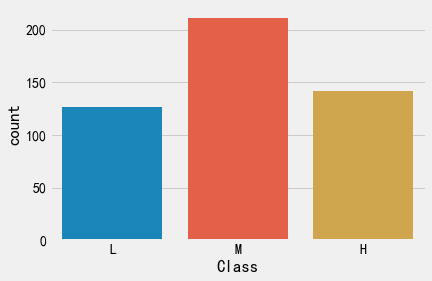

In [9]:
# seaborn库中countplot函数，用于画分类图。
sns.countplot(x = 'Class',order = ['L','M','H'],data = df)

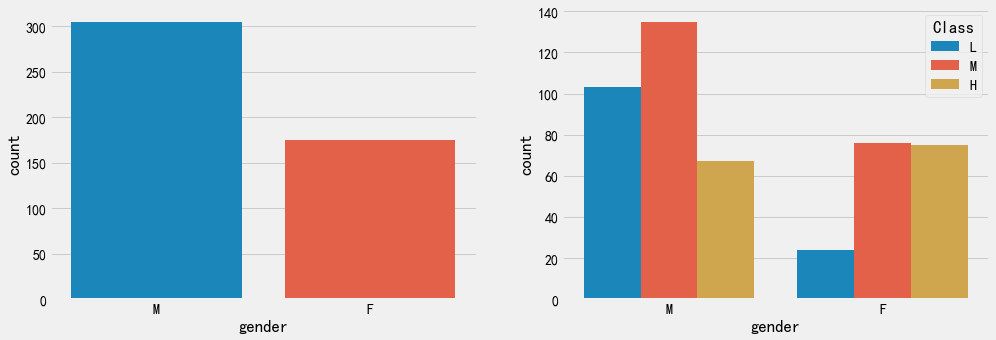

In [10]:
# matplotlib中subplots，用于在一张图中画多个坐标系
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = 'gender' ,data = df,ax = ax1)
sns.countplot(x = 'gender', hue = 'Class',hue_order = ['L','M','H'],data = df , ax = ax2)

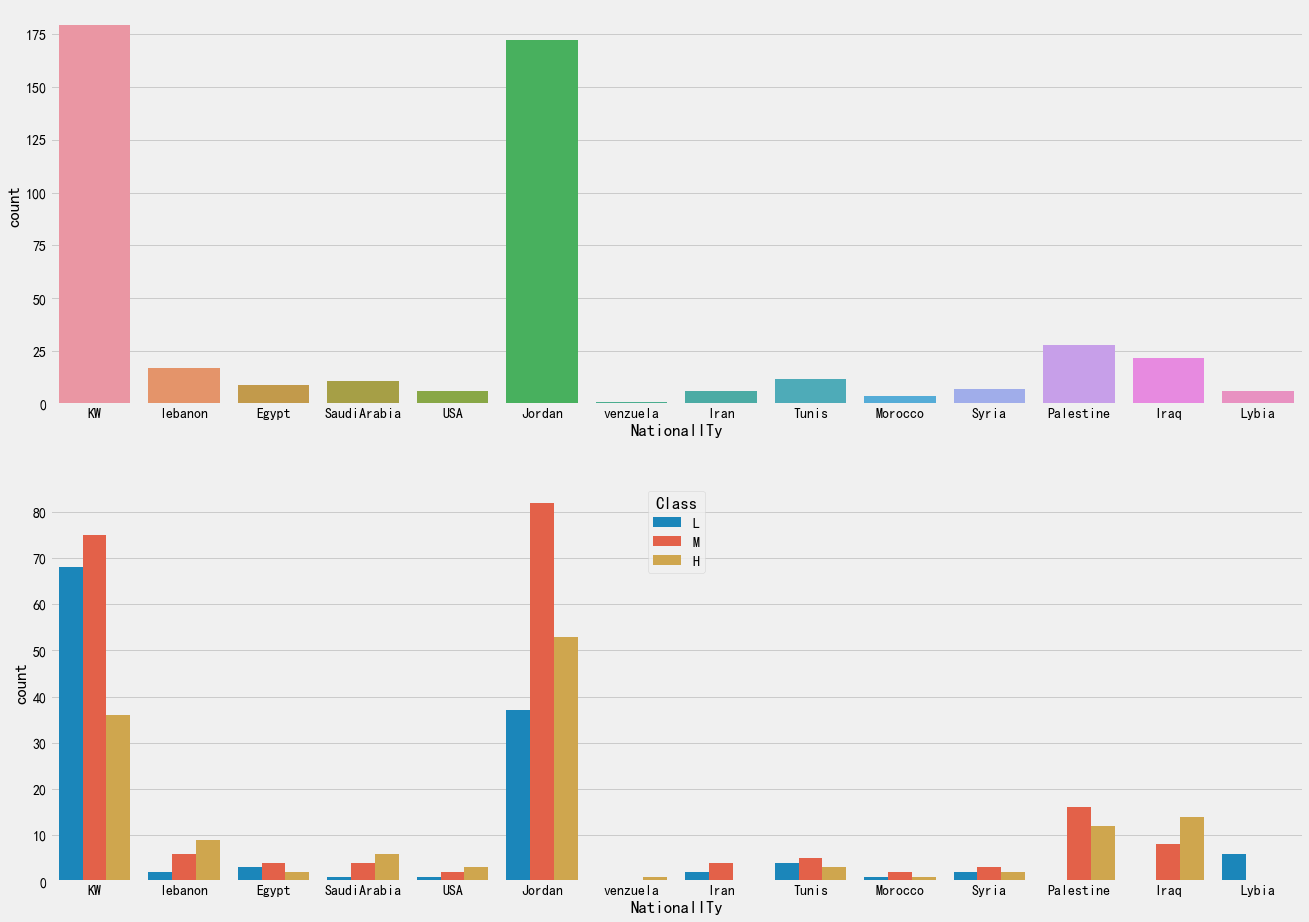

In [11]:
f, [ax1,ax2] = plt.subplots(2, 1, figsize=(20, 15))
sns.countplot(x = 'NationalITy' ,data = df,ax = ax1)
sns.countplot(x = 'NationalITy', hue = 'Class',hue_order = ['L','M','H'],data = df , ax = ax2)

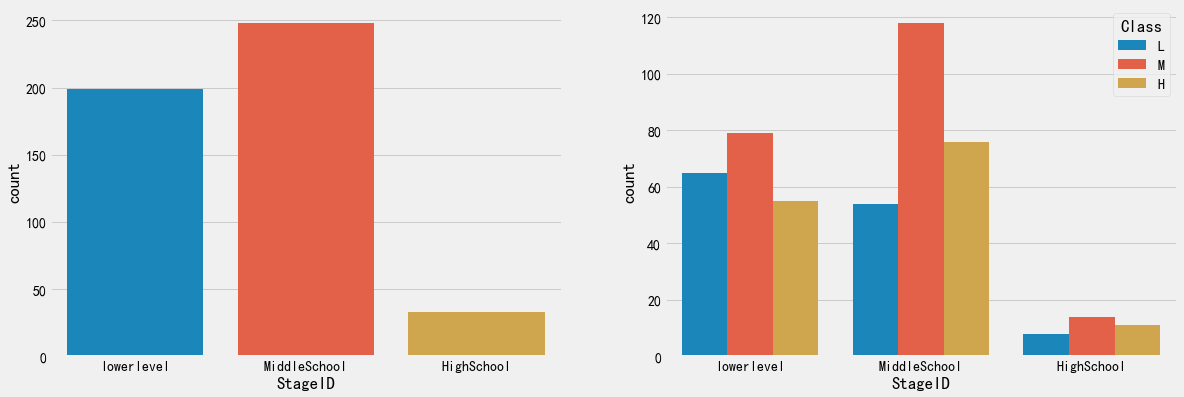

In [12]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x = 'StageID' ,data = df,ax = ax1)
sns.countplot(x = 'StageID', hue = 'Class',hue_order = ['L','M','H'],data = df , ax = ax2)

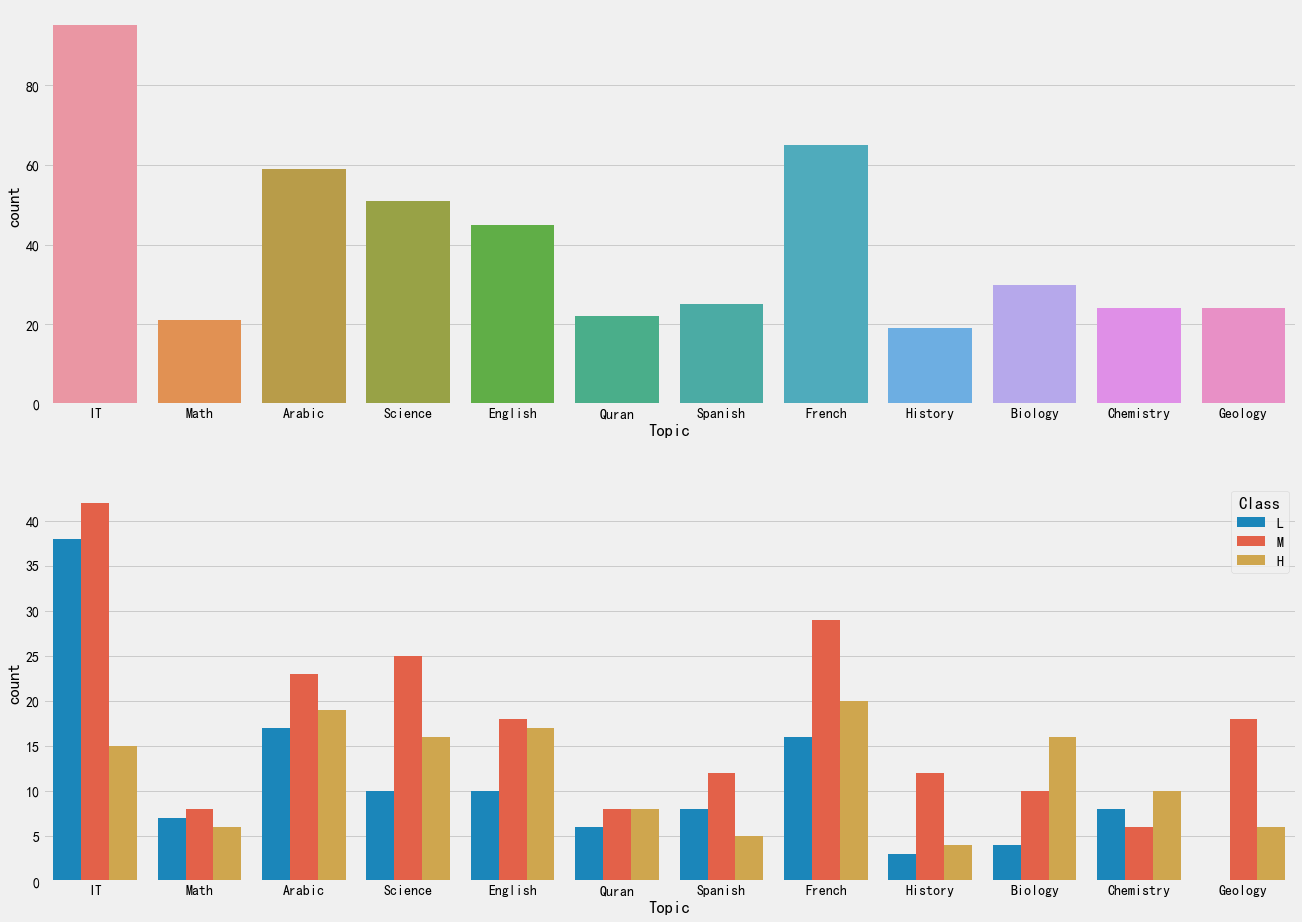

In [13]:
f, [ax1,ax2] = plt.subplots(2, 1, figsize=(20, 15))
sns.countplot(x = 'Topic' ,data = df,ax = ax1)
sns.countplot(x = 'Topic', hue = 'Class',hue_order = ['L','M','H'],data = df , ax = ax2)

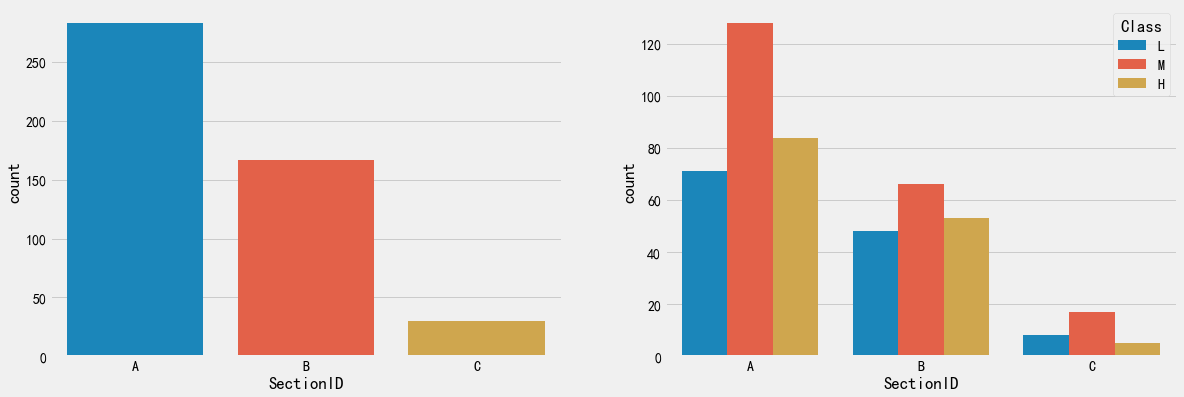

In [14]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(18, 6))
sns.countplot(x = 'SectionID' ,data = df,ax = ax1)
sns.countplot(x = 'SectionID', hue = 'Class',hue_order = ['L','M','H'],data = df , ax = ax2)

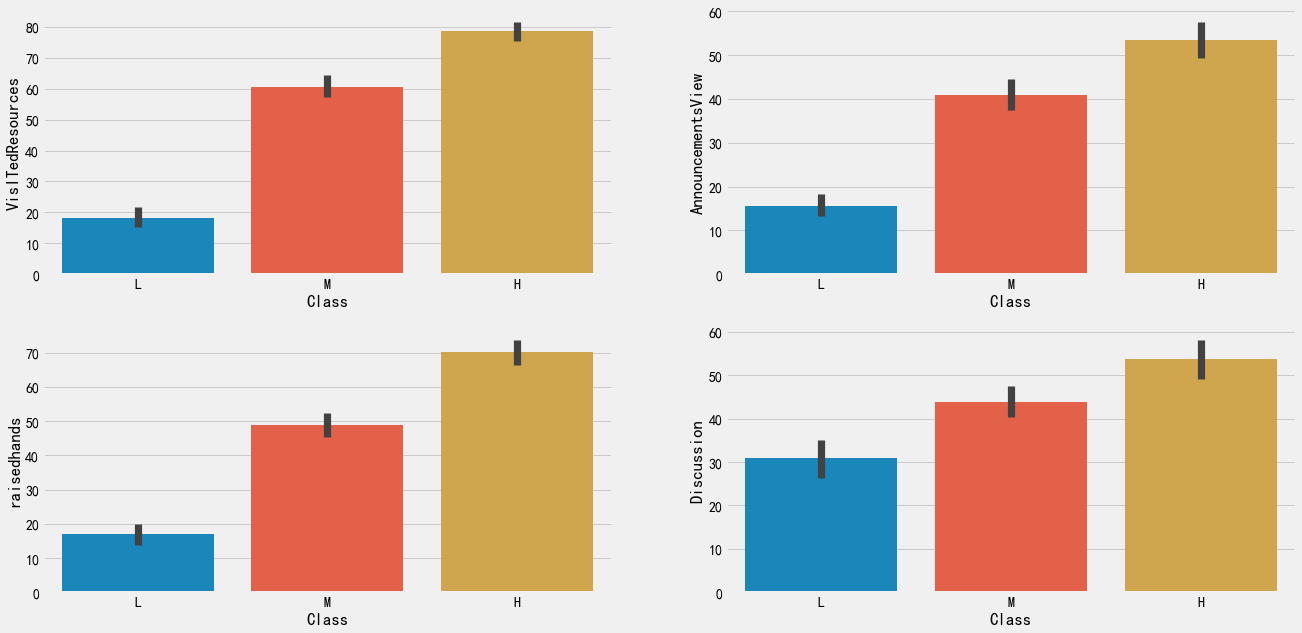

In [15]:
fig, axes = plt.subplots(2,2,figsize = (20,10))
sns.barplot(x = 'Class',y = 'VisITedResources',data = df, order = ['L','M','H'], ax = axes[0,0])
sns.barplot(x = 'Class',y = 'AnnouncementsView',data = df, order = ['L','M','H'],ax = axes[0,1])
sns.barplot(x = 'Class',y = 'raisedhands',data = df, order = ['L','M','H'],ax = axes[1,0])
sns.barplot(x = 'Class',y = 'Discussion',data = df, order = ['L','M','H'],ax = axes[1,1])

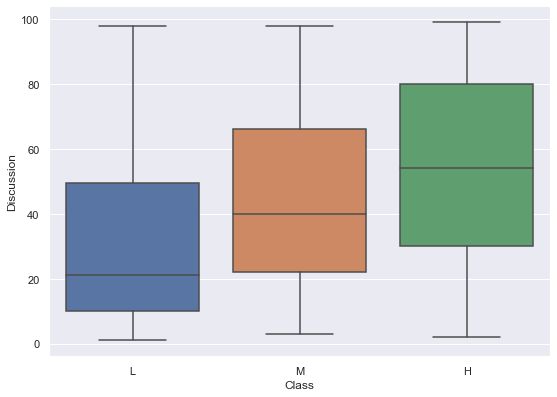

In [16]:
# seaborn.set()设置风格
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x = 'Class',y = 'Discussion', data = df, order = ['L','M','H'])

In [17]:
#pandas中的corr函数方法，用于计算列与列之间的相关系数，返回相关系数矩阵
corr=df[['VisITedResources','raisedhands','AnnouncementsView','Discussion']].corr()
corr

,VisITedResources,raisedhands,AnnouncementsView,Discussion
VisITedResources,1.000000,0.691572,0.594500,0.243292
raisedhands,0.691572,1.000000,0.643918,0.339386
AnnouncementsView,0.594500,0.643918,1.000000,0.417290
Discussion,0.243292,0.339386,0.417290,1.000000


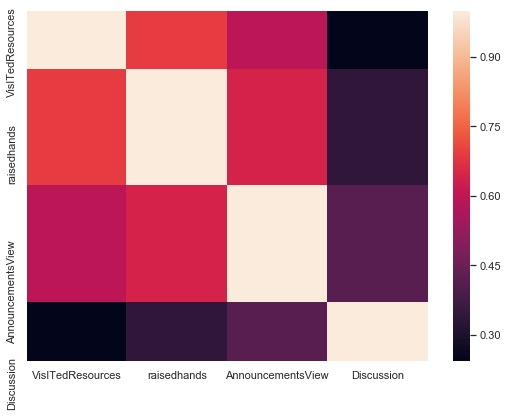

In [18]:
# seaborn中的heatmap，绘制矩形数据作为颜色编码矩阵
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)

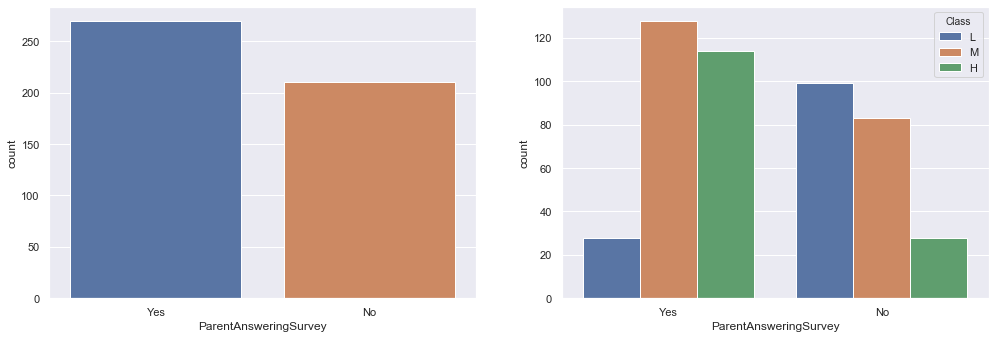

In [19]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = 'ParentAnsweringSurvey' ,data = df,ax = ax1)
sns.countplot(x='ParentAnsweringSurvey',hue = 'Class',hue_order = ['L','M','H'],data = df , ax = ax2)

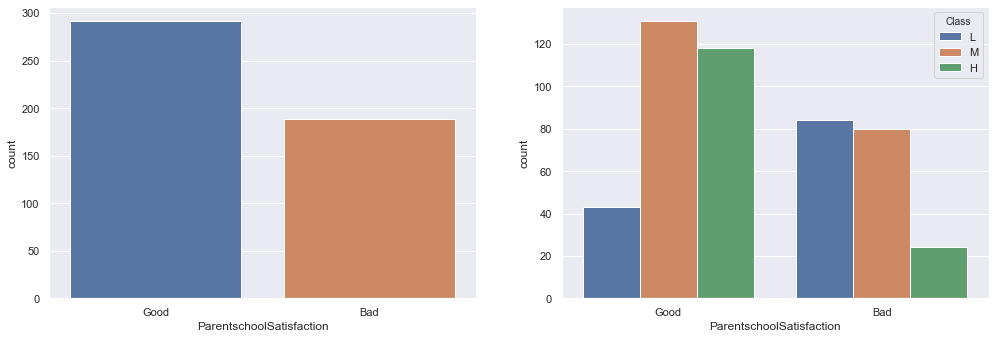

In [20]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = 'ParentschoolSatisfaction' ,data = df,ax = ax1)
sns.countplot(x='ParentschoolSatisfaction',hue = 'Class',hue_order = ['L','M','H'],data = df , ax = ax2)

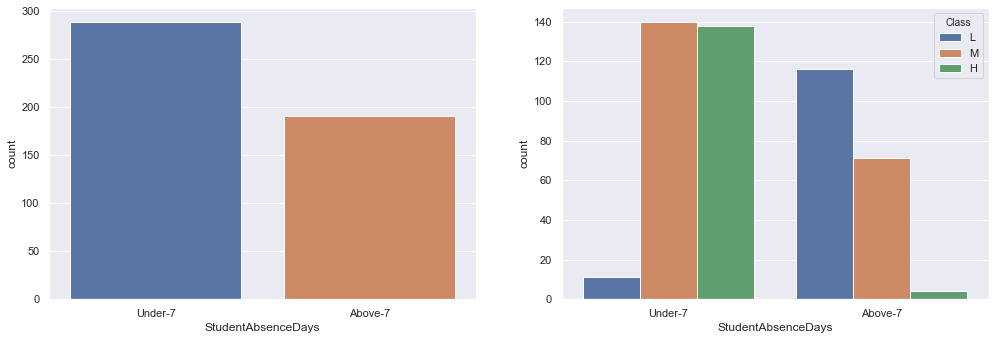

In [21]:
f, [ax1,ax2] = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x = 'StudentAbsenceDays' ,data = df,ax = ax1)
sns.countplot(x = 'StudentAbsenceDays', hue = 'Class',hue_order = ['L','M','H'],data = df , ax = ax2)

In [22]:
#根据各个特征相关系数情况，构建合适的特征工程
df['handsAndVistResourse'] = df['raisedhands'] * df['VisITedResources'] 
df['handsAndAnnouncementsView'] = df['raisedhands'] * df['AnnouncementsView']    
df['compatable']=df['raisedhands']+df['VisITedResources']+df['AnnouncementsView'] + df['Discussion']
df['compatable1']=df['ParentAnsweringSurvey']+df['StudentAbsenceDays']+df['ParentschoolSatisfaction']+df['Relation']
df['compatable2'] = df['gender']+df['Relation']
#删除没有太大关系的特征
X=df.drop(['gender','SectionID','StageID','GradeID','Topic','NationalITy','PlaceofBirth','Semester','Class'],axis = 1)
X = df.drop(['Class'],axis = 1)
Y = df['Class']
X = pd.get_dummies(X)
X.head(10)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,handsAndVistResourse,handsAndAnnouncementsView,compatable,gender_F,gender_M,NationalITy_Egypt,...,compatable1_YesAbove-7GoodFather,compatable1_YesAbove-7GoodMum,compatable1_YesUnder-7BadFather,compatable1_YesUnder-7BadMum,compatable1_YesUnder-7GoodFather,compatable1_YesUnder-7GoodMum,compatable2_FFather,compatable2_FMum,compatable2_MFather,compatable2_MMum
0,15,16,2,20,240,30,53,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,20,20,3,25,400,60,68,0,1,0,...,0,0,0,0,1,0,0,0,1,0
2,10,7,0,30,70,0,47,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,30,25,5,35,750,150,95,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,40,50,12,50,2000,480,152,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,42,30,13,70,1260,546,155,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6,35,12,0,17,420,0,64,0,1,0,...,0,0,0,0,0,0,0,0,1,0
7,50,10,15,22,500,750,97,0,1,0,...,0,0,0,0,1,0,0,0,1,0
8,12,21,16,50,252,192,99,1,0,0,...,0,0,0,0,1,0,1,0,0,0
9,70,80,25,70,5600,1750,245,1,0,0,...,0,0,0,0,1,0,1,0,0,0


In [24]:
from sklearn.tree import DecisionTreeClassifier	
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 10)
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=3)
dtc.fit(X_train, y_train)
Predict = dtc.predict(X_test)
print('Predict',Predict)
Score = accuracy_score(y_test, Predict)
Score

Predict ['M' 'M' 'M' 'L' 'M' 'H' 'M' 'H' 'L' 'L' 'H' 'M' 'M' 'M' 'M' 'H' 'L' 'H'
 'M' 'H' 'L' 'H' 'L' 'H' 'M' 'L' 'H' 'M' 'M' 'H' 'H' 'H' 'L' 'M' 'H' 'L'
 'M' 'M' 'L' 'M' 'M' 'L' 'M' 'L' 'M' 'H' 'H' 'H' 'M' 'H' 'M' 'L' 'M' 'M'
 'M' 'H' 'H' 'L' 'M' 'H' 'H' 'L' 'H' 'M' 'L' 'M' 'M' 'H' 'L' 'H' 'M' 'L'
 'M' 'M' 'M' 'H' 'L' 'L' 'H' 'H' 'L' 'H' 'L' 'L' 'M' 'H' 'M' 'M' 'H' 'M'
 'H' 'L' 'M' 'M' 'M' 'M']


0.71875

In [25]:
from sklearn.naive_bayes import GaussianNB 
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 10)
nb = GaussianNB()
nb.fit(X_train, y_train)
Predict = nb.predict(X_test)
print('Predict',Predict)
Score = accuracy_score(y_test, Predict)
Score

Predict ['M' 'M' 'M' 'L' 'M' 'H' 'H' 'H' 'M' 'L' 'M' 'L' 'M' 'M' 'M' 'H' 'L' 'H'
 'M' 'M' 'M' 'H' 'L' 'M' 'H' 'L' 'H' 'H' 'M' 'H' 'H' 'H' 'L' 'M' 'M' 'L'
 'M' 'M' 'L' 'H' 'H' 'L' 'M' 'L' 'M' 'H' 'H' 'M' 'M' 'M' 'M' 'L' 'H' 'M'
 'M' 'M' 'H' 'L' 'M' 'H' 'H' 'L' 'H' 'M' 'L' 'M' 'M' 'H' 'L' 'H' 'M' 'L'
 'M' 'M' 'H' 'H' 'M' 'L' 'M' 'H' 'L' 'H' 'L' 'L' 'M' 'H' 'L' 'H' 'H' 'M'
 'H' 'L' 'L' 'L' 'H' 'M']


0.8020833333333334

In [26]:
#区分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 10)
#训练模型并检测准确率
Logit = LogisticRegression()
Logit.fit(X_train, y_train)
Predict = Logit.predict(X_test)
print('Predict',Predict)
Score = accuracy_score(y_test, Predict)
Score

Predict ['H' 'M' 'M' 'L' 'M' 'H' 'H' 'M' 'M' 'L' 'M' 'L' 'M' 'M' 'M' 'M' 'L' 'H'
 'M' 'M' 'L' 'M' 'M' 'M' 'M' 'L' 'M' 'M' 'M' 'H' 'H' 'H' 'L' 'M' 'H' 'L'
 'M' 'M' 'L' 'H' 'M' 'L' 'M' 'L' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'L' 'M' 'M'
 'M' 'H' 'H' 'L' 'M' 'H' 'H' 'L' 'H' 'M' 'L' 'M' 'M' 'M' 'L' 'H' 'M' 'L'
 'M' 'M' 'M' 'H' 'M' 'L' 'M' 'H' 'L' 'H' 'L' 'L' 'M' 'H' 'M' 'H' 'H' 'M'
 'M' 'L' 'M' 'M' 'H' 'M']


0.8333333333333334